In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("C:\\Users\\dell\\Desktop\\ML PROJECTS\\loan_prediction\\train.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Data Preprocessing

In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
data.Gender = data.Gender.fillna('Male')

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data.Married = data.Married.fillna('Yes')

In [12]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data.Dependents = data.Dependents.fillna('0')

In [14]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [16]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [18]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [20]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [22]:
data.LoanAmount = data.LoanAmount.fillna(120.0)

In [23]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
#Split the data into input and output
X = data.iloc[:,1:12].values
y = data.iloc[:,12]

In [25]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [26]:
#train and test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=0)

In [29]:
X_train

array([['Male', 'Yes', '3+', ..., 300.0, 0.0, 'Semiurban'],
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'No', '0', ..., 180.0, 0.0, 'Urban'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder_x = LabelEncoder()

In [32]:
for i in range(0,6):
 X_train[:,i] = labelencoder_x.fit_transform(X_train[:,i])
X_train[:,10] = labelencoder_x.fit_transform(X_train[:,10])

In [33]:
labelencoder_y = LabelEncoder()

In [34]:
y_train = labelencoder_y.fit_transform(y_train)

In [35]:
labelencoder_xt= LabelEncoder()

In [36]:
for i in range(0,6):
  X_test[:,i] = labelencoder_xt.fit_transform(X_test[:,i])
X_test[:,10] = labelencoder_xt.fit_transform(X_test[:,10])

In [37]:
labelencoder_yt= LabelEncoder()

In [38]:
y_test = labelencoder_yt.fit_transform(y_test)

In [39]:
y_train

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [40]:
X_train

array([[1, 1, 3, ..., 300.0, 0.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 0],
       [1, 0, 0, ..., 180.0, 0.0, 2],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [41]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
X_train = sc.fit_transform(X_train)

In [44]:
X_train

array([[ 0.46919134,  0.72038215,  2.17558327, ..., -0.65353768,
        -2.38316747, -0.05797812],
       [-2.13132663, -1.38815211, -0.75835689, ...,  0.2808562 ,
         0.41960962, -1.31658644],
       [ 0.46919134, -1.38815211, -0.75835689, ..., -2.52232546,
        -2.38316747,  1.20063021],
       ...,
       [ 0.46919134,  0.72038215,  2.17558327, ...,  0.2808562 ,
         0.41960962, -0.05797812],
       [ 0.46919134,  0.72038215, -0.75835689, ...,  0.2808562 ,
         0.41960962,  1.20063021],
       [-2.13132663,  0.72038215, -0.75835689, ...,  0.2808562 ,
         0.41960962, -0.05797812]])

In [45]:
X_test = sc.fit_transform(X_test)

In [46]:
# PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=3)

In [49]:
X_train = pca.fit_transform(X_train)

In [50]:
X_test = pca.fit_transform(X_test)

In [51]:
X_train

array([[ 1.46810978, -1.77618682, -0.07926616],
       [-2.45934612,  1.32694875,  0.11621044],
       [-1.20626913, -1.48168946, -0.97913981],
       ...,
       [ 1.96474842, -0.50975708,  0.40853639],
       [ 0.07106054, -0.37573089, -0.80237773],
       [-0.40296653,  1.03492134,  0.95410165]])

In [52]:
#Classification
# logistic regression
# nearest neighbor
# SVM

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [54]:
lrclf = LogisticRegression(max_iter=100,random_state=0)

In [55]:
lrclf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [56]:
lrclf.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [57]:
y_pred = lrclf.predict(X_test)

In [58]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [59]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0])

In [60]:
from sklearn import metrics

In [61]:
metrics.accuracy_score(y_test,y_pred)

0.7311827956989247

In [62]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [63]:
cm

array([[ 2, 23],
       [ 2, 66]], dtype=int64)

In [64]:
X_test[:,0]

array([ 0.52530514,  1.63455244, -1.51354724, -0.41836246, -0.87733212,
        0.55107131, -3.03453642, -1.28605849,  1.08573946,  0.300648  ,
        2.13252588, -0.15471985,  0.50719347, -2.00233755, -0.86206327,
       -0.66929683,  0.51274387,  1.17836567,  2.51452894,  0.8150327 ,
        2.07146352,  0.08851865, -1.31139802, -1.92904785,  0.51346737,
       -1.6916927 ,  0.49155023, -0.78297396, -0.8703917 ,  2.33590074,
       -1.34691828,  0.7413049 , -0.13389295, -1.02485384, -0.47333418,
        2.17922338,  0.02313469,  1.12573035, -0.77798003, -1.08156265,
        2.01910169, -0.76351099, -1.11491761, -1.06221363,  0.73379854,
       -0.13880725, -0.77957293,  1.57444094, -0.9905691 ,  0.50104684,
       -1.32686479, -0.60156676,  0.30205464,  0.61046092,  0.4735015 ,
       -1.22903156,  0.01299391,  0.25218901, -1.60087945,  0.47143957,
        3.2853448 ,  0.74173757,  0.37270979,  2.80946569, -1.70911306,
       -1.89132752,  0.48794049,  1.05066765, -0.42968474,  1.17

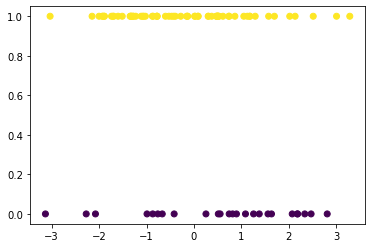

In [65]:
# observed data plot
plt.scatter(X_test[:,0],y_test,c=y_test)

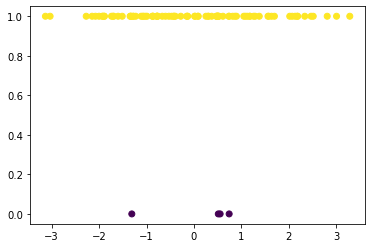

In [66]:
# predicted data plot
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [67]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knnclf = KNeighborsClassifier(n_neighbors=5)

In [69]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred=knnclf.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [72]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0])

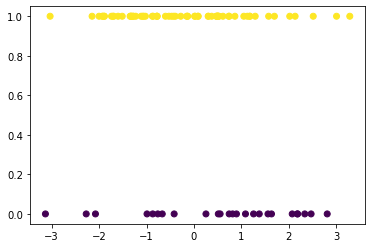

In [73]:
plt.scatter(X_test[:,0],y_test, c=y_test)

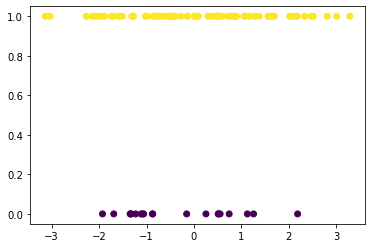

In [74]:
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [75]:
metrics.accuracy_score(y_test,y_pred)

0.6451612903225806

In [76]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [77]:
cm

array([[ 6, 19],
       [14, 54]], dtype=int64)

In [78]:
# Support Vector Machine
from sklearn.svm import SVC

In [79]:
svcrbf = SVC(random_state=0)
svclin = SVC(random_state=0)

In [80]:
svcrbf.fit(X_train,y_train)
svclin.fit(X_train,y_train)

SVC(random_state=0)

In [81]:
y_predr = svcrbf.predict(X_test)
y_predl = svclin.predict(X_test)

In [82]:
#rbf svm
metrics.accuracy_score(y_test,y_predr)

0.7204301075268817

In [83]:
#lin svm
metrics.accuracy_score(y_test,y_predl)

0.7204301075268817

In [84]:
#logestic regression model is the best of out of the these three models